# Submission : Klasifikasi Gambar
Submission berupa program jaringan saraf tiruan menggunakan TensorFlow. Program harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.

Nama : Reski Mulud Muchamad <br>
ID Dicoding : [reski-mulud](https://dicoding.com/users/reski-mulud) <br>
e-mail : [reski.mulud@gmail.com](mailto:reski.mulud@gmail.com) <br>

# Mempersiapkan Datasets


1.   Mengunduh data (source : https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip)
2.   Mengekstract data menggunakan metode unzip (library: zipfile)
3. Mengubah datasets menjadi dataframe



## Mendownload Datasets

In [1]:
# download datasets menggnakan widget
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-04-27 13:42:39--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  6.85MB/s    in 50s     

2021-04-27 13:43:29 (6.17 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [2]:
# proses mengekstrak data
import zipfile, os

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [3]:
os.remove(base_dir + '/README_rpc-cv-images.txt')
os.listdir(base_dir)

['paper', 'scissors', 'rock']

In [4]:
# mengubah dataset kedalam dataframe
import pandas as pd

# looping data
file_name = []
path_name =  []
tag = []
for path, subdirs, files in os.walk(base_dir) :
  for name in files :
    path_name.append(os.path.join(path, name))
    tag.append(path.split('/')[-1])
    file_name.append(name)

# memasukan data yang telah dikumpulkan pada looping kedalam dataframe
df = pd.DataFrame({"path":path_name,'file_name':file_name,"tag":tag})
df.groupby(['tag']).size()

tag
paper       712
rock        726
scissors    750
dtype: int64

In [5]:
# cek sample dataframe
df.head()

,path,file_name,tag
0,/tmp/rockpaperscissors/rps-cv-images/paper/jCT...,jCTsslbOLn04znvK.png,paper
1,/tmp/rockpaperscissors/rps-cv-images/paper/84J...,84JL84r6Jcpp5Udi.png,paper
2,/tmp/rockpaperscissors/rps-cv-images/paper/yB1...,yB11HwUEuYHhVlKo.png,paper
3,/tmp/rockpaperscissors/rps-cv-images/paper/KqC...,KqCGmJ8WCrqE5Uvg.png,paper
4,/tmp/rockpaperscissors/rps-cv-images/paper/PTj...,PTjpGk2rKf6mhx9z.png,paper


## Membagi data menjadi train dan validation
**Split data** : Data dibagi menjadi 2 bagian, 60% untuk data training, dan 40% untuk validation

In [6]:
# import library
from sklearn.model_selection import train_test_split

In [7]:
# split data
x = df['path']
y = df['tag']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [8]:
# menyatukan masing2 data kedalam dataframe
df_train = pd.DataFrame({'path': x_train, 'tag': y_train, 'set': 'train'})
df_val = pd.DataFrame({'path': x_test, 'tag': y_test, 'set': 'val'})

In [9]:
df_train

,path,tag,set
1037,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
1529,/tmp/rockpaperscissors/rps-cv-images/rock/zrrY...,rock,train
769,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
599,/tmp/rockpaperscissors/rps-cv-images/paper/tfM...,paper,train
401,/tmp/rockpaperscissors/rps-cv-images/paper/4bk...,paper,train
...,...,...,...
960,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
905,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
1096,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train
235,/tmp/rockpaperscissors/rps-cv-images/paper/Cbi...,paper,train


In [10]:
df_val

,path,tag,set
1556,/tmp/rockpaperscissors/rps-cv-images/rock/NpJE...,rock,val
201,/tmp/rockpaperscissors/rps-cv-images/paper/rX4...,paper,val
2006,/tmp/rockpaperscissors/rps-cv-images/rock/PHtj...,rock,val
763,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,val
1073,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,val
...,...,...,...
427,/tmp/rockpaperscissors/rps-cv-images/paper/RtF...,paper,val
289,/tmp/rockpaperscissors/rps-cv-images/paper/4hc...,paper,val
1889,/tmp/rockpaperscissors/rps-cv-images/rock/2EAk...,rock,val
529,/tmp/rockpaperscissors/rps-cv-images/paper/ClP...,paper,val


In [11]:
# melihat proporsi pada masing masing set apakah sudah ok atau masih ada yang ingin diubah
df_all = df_train.append(df_val).reset_index(drop=1)\

print('===================================================== \n')
print(df_all.groupby(['set','tag']).size(),'\n')

print('===================================================== \n')

#cek sample datanya
df_all.sample(3)


set    tag     
train  paper       423
       rock        434
       scissors    455
val    paper       289
       rock        292
       scissors    295
dtype: int64 




,path,tag,set
963,/tmp/rockpaperscissors/rps-cv-images/paper/Vrh...,paper,train
1510,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,val
230,/tmp/rockpaperscissors/rps-cv-images/scissors/...,scissors,train


## Merapihkan folder
Setelah membagi data menjadi train dan val kedalam dataframe, file akan dipisahkan dan dimasukan kedalam folder train dan val sesuai data yang ada di dataframe(df_train, df_val). Penamaan folder juga berguna untuk pelebelan data

In [12]:
# import library
import shutil
from tqdm.notebook import tqdm

In [13]:
source_path = base_dir + '/'
datasets_path = '/tmp/rockpaperscissors/datasets/'

In [14]:
for index, row, in tqdm(df_all.iterrows()) :
  # menemukan filepath
  file_path = row['path']
  if os.path.exists(file_path) == False :
    file_path = os.path.join(source_path,row['path'],row['image'].split('.')[0])
    
  # membuat direktori folder destinasi
  if os.path.exists(os.path.join(datasets_path,row['set'],row['tag'])) == False:
    os.makedirs(os.path.join(datasets_path,row['set'],row['tag']))

  # mendefinisikan direktori file
  destination_file_name = file_path.split('/')[-1]
  file_dest = os.path.join(datasets_path,row['set'],row['tag'],destination_file_name)

  # memindahkan file
  if os.path.exists(file_dest) == False :
    shutil.copy2(file_path, file_dest)


In [15]:
train_dir = os.path.join(datasets_path, 'train')
val_dir = os.path.join(datasets_path, 'val')

In [16]:
print("Data Training : ", os.listdir(train_dir))
train_rock = os.path.join(train_dir, 'rock')
train_scissors = os.path.join(train_dir, 'scissors')
train_paper = os.path.join(train_dir, 'paper')

print()

print("Batu : ", os.listdir(train_rock)[:5])
print("Gunting : ", os.listdir(train_scissors)[:5])
print("Kertas : ", os.listdir(train_paper)[:5])

Data Training :  ['paper', 'scissors', 'rock']

Batu :  ['5uXiqEc4q2Vi0NCX.png', 'RYxKlMYeLJcQ63zQ.png', '00nKV8oHuTGi20gq.png', 'CpWDLKaUbf6poyIj.png', '19H63c0MWD56EWNq.png']
Gunting :  ['dxFGJyDhnNu3iOmm.png', 'M7i5TSor3J09Sy1O.png', 'AIdBo3sdoduT52KJ.png', 'uI2O1DwI1nIIx9Qu.png', 'a9YV7Tzoj751vTun.png']
Kertas :  ['yB11HwUEuYHhVlKo.png', 'PTjpGk2rKf6mhx9z.png', '7IYZ788SAadhvemj.png', 'n10pI9JDPyeM0P73.png', 'cI2tl5vM2koXZPfG.png']


In [17]:
print("Data Validation : ", os.listdir(val_dir))
val_rock = os.path.join(val_dir, 'rock')
val_scissors = os.path.join(val_dir, 'scissors')
val_paper = os.path.join(val_dir, 'paper')

print()

print("Batu : ", os.listdir(val_rock)[:5])
print("Gunting : ", os.listdir(val_scissors)[:5])
print("Kertas : ", os.listdir(val_paper)[:5])

Data Validation :  ['paper', 'scissors', 'rock']

Batu :  ['PXIxKdf4DvyHXy89.png', '02vG75hQW9Vp4oTl.png', 'Yzx0RwB2AFNAvC6s.png', 'PP5HF3TrSg1DzqjX.png', 'TLbqMqwDrww8CS0p.png']
Gunting :  ['Ea5uaRMj6JwEAEtn.png', 'Hkq2KHtnKxyBLLPU.png', 'hyQDSSjNFHX7Wirc.png', 'Ep0yJCcioRpgZquy.png', 'V14OoL0RMpvwPptc.png']
Kertas :  ['jCTsslbOLn04znvK.png', '84JL84r6Jcpp5Udi.png', 'KqCGmJ8WCrqE5Uvg.png', 'QqPSoi6Vj2Vbua3V.png', '5FVy5hSvZ9c0M2Y5.png']


In [18]:
"""
Hal selanjutnya adalah kita menampung direktori dari setiap kelas 
pada direktori latih dan direktori validasi ke dalam variabel. 
Pembuatan direktori di sini akan dipakai saat menggunakan 
objek image data generator.
"""

# variable untuk direktori data train
train_rock_dir = os.path.join(train_dir, 'rock') # batu
train_scissors_dir = os.path.join(train_dir, 'scissors') #  gunting
train_paper_dir = os.path.join(train_dir, 'paper')

# variable untuk data validation
val_rock_dir = os.path.join(val_dir, 'rock') # batu
val_scissors_dir = os.path.join(val_dir, 'scissors') #  gunting
val_paper_dir = os.path.join(val_dir, 'paper')

**Datasets sudah siap digunakan**

# Preprocessing Data
Langkah selanjutnya adalah kita membuat sebuah objek ImageDataGenerator 
untuk data training dan data testing. Image data generator adalah sebuah 
fungsi yang sangat berguna untuk mempersiapkan data latih dan data testing 
yang akan diberikan ke model. Beberapa kemudahan yang disediakan Image 
data generator adalah, preprocessing data, pelabelan sampel otomatis, 
dan augmentasi gambar.

## Augmentasi Gambar
Kode di bawah menunjukkan proses augmentasi gambar pada setiap sampel di dataset. 
Augmentasi gambar adalah teknik untuk menciptakan data-data baru dari data yang telah ada. 
Contoh augmentasi gambar adalah horizontal flip di mana gambar akan dibalikkan secara horizontal

In [21]:
# import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(
                  rescale=1./255.0,
                  rotation_range=40,                             
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='nearest')

test_datagen = ImageDataGenerator(
                  rescale=1./255.0,
                  rotation_range=40,                             
                  width_shift_range=0.2,
                  height_shift_range=0.2,
                  shear_range=0.2,
                  zoom_range=0.2,
                  horizontal_flip=True,
                  fill_mode='nearest')

In [23]:
"""
Lalu kita dapat menggunakan objek image data generator sebelumnya untuk 
mempersiapkan data latih yang akan dipelajari oleh model.
"""

# membuat train  generator
train_generator = train_datagen.flow_from_directory(
                    train_dir, #direktori data latih
                    target_size=(150, 150), # mengubah resolusi gambar menjadi 150 x 150 px
                    batch_size=16,
                    # karna kita merupakan masalah 3 kelas, maka menggunakan categorical class
                    shuffle=True,                                                                   
                    subset='training',
                    class_mode='categorical')

# membuat validation generator
validation_generator = test_datagen.flow_from_directory(
                    val_dir, #direktori data latih
                    target_size=(150, 150), # mengubah resolusi gambar menjadi 150 x 150 px
                    batch_size=16,
                    # karna kita merupakan masalah 3 kelas, maka menggunakan categorical class
                    shuffle=True,                                                                   
                    subset='training',
                    class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


# Membangun model saraf tiruan

In [57]:
"""
Setelah data telah siap, kita bisa membangun arsitektur sebuah CNN. 
Sebuah CNN pada keras mirip dengan MLP untuk klasifikasi fashion MNIST 
yang kita bahas sebelumnya. Perbedaannya hanya pada terdapatnya 2 lapis 
layer konvolusi dan max pooling. Anda tentu masih ingat bahwa fungsi dari 
layer konvolusi adalah untuk mengekstraksi atribut pada gambar. Sedangkan 
layer max pooling berguna untuk mereduksi resolusi gambar sehingga proses 
pelatihan MLP lebih cepat.
"""
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)), #Layer Konvolusi pertama
                                    tf.keras.layers.MaxPooling2D(2, 2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi kedua
                                    tf.keras.layers.MaxPooling2D(2,2), 
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),                         #Layer Konvolusi ketiga
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),                                                    #Layer input untuk Deep Learning Neural Network
                                    tf.keras.layers.Dropout(0.5),
                                    
                                    tf.keras.layers.Dense(128, activation='relu'),                                #Hiden layer pertama dengan 128 neuron
                                    
                                    tf.keras.layers.Dense(512, activation='relu'),                                #Hiden layer kedua dengan 512 neuron

                                    tf.keras.layers.Dense(512, activation='relu'),                                #Hidden layer ketiga dengan 512 neuron
                                    
                                    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9248)             

In [58]:
# compile model dengan adam optimizer loss function 'categorical_crossentropy'
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Melatih model saraf tiruan

In [59]:
"""
Setelah menentukan loss function dan optimizer pada CNN, kita dapat melatih 
model kita menggunakan metode fit. Dengan menggunakan image data generator, 
kita tidak perlu memasukkan parameter gambar dan labelnya. Image data 
generator secara otomatis melabeli sebuah gambar sesuai dengan direktori 
di mana ia disimpan. Contohnya sebuah gambar yang terdapat di direktori clean, 
secara otomatis akan diberi label “clean” oleh image data generator.
"""

history = model.fit(train_generator, 
          steps_per_epoch=len(train_generator), # jumlah batch yang akan dieksekusi setiap epoch
          epochs=12,
          validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
          validation_steps=len(validation_generator),
          verbose=1)

Epoch 1/12
82/82 [==============================] - 44s 526ms/step - loss: 1.1257 - accuracy: 0.3500 - val_loss: 1.0607 - val_accuracy: 0.4110
Epoch 2/12
82/82 [==============================] - 43s 524ms/step - loss: 1.0519 - accuracy: 0.4633 - val_loss: 0.7486 - val_accuracy: 0.6747
Epoch 3/12
82/82 [==============================] - 43s 526ms/step - loss: 0.7737 - accuracy: 0.6737 - val_loss: 0.6051 - val_accuracy: 0.7728
Epoch 4/12
82/82 [==============================] - 43s 520ms/step - loss: 0.6984 - accuracy: 0.6927 - val_loss: 0.5953 - val_accuracy: 0.7477
Epoch 5/12
82/82 [==============================] - 43s 521ms/step - loss: 0.6069 - accuracy: 0.7543 - val_loss: 0.4742 - val_accuracy: 0.8082
Epoch 6/12
82/82 [==============================] - 43s 519ms/step - loss: 0.5535 - accuracy: 0.7763 - val_loss: 0.7209 - val_accuracy: 0.7180
Epoch 7/12
82/82 [==============================] - 47s 570ms/step - loss: 0.4892 - accuracy: 0.8094 - val_loss: 0.3437 - val_accuracy: 0.8744

# Plot akurasi model

In [60]:
# import library
import matplotlib.pyplot as plt

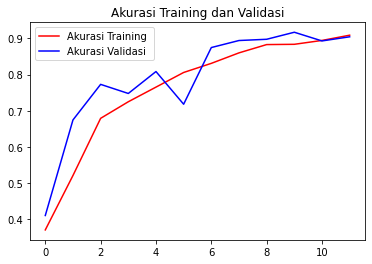

<Figure size 432x288 with 0 Axes>

In [61]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Akurasi Training ')                 
plt.plot(epochs, val_acc, 'b', label='Akurasi Validasi')
plt.title('Akurasi Training dan Validasi')
plt.legend(loc=0) 
plt.figure()                                                                      
plt.show()

# Prediksi gambar dengan model

Saving zepzkaBk60xgpP3C.png to zepzkaBk60xgpP3C.png
zepzkaBk60xgpP3C.png
Bentuk tangan tersebut menunjukan bentuk GUNTING


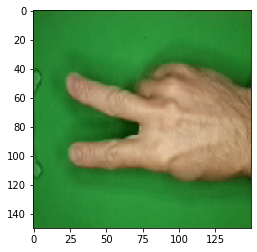

In [67]:
# import library
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys() :

  # prediksi image
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)

  print(fn)
  
  if classes[0][0] == 1 :
    print("Bentuk tangan tersebut menunjukan bentuk KERTAS")
  elif classes[0][1] == 1 :
    print("Bentuk tangan tersebut menunjukan bentuk BATU")
  elif classes[0][2] == 1 :
    print("Bentuk tangan tersebut menunjukan bentuk GUNTING")
  else:
    print("Bentuk tangan tidak ditemukan")